In [211]:
#Lets go innocent

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [279]:
df = pd.read_csv("retail_sales_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])

In [280]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [281]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [282]:
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

In [283]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Week
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11-20
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02-27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01-09
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05-15
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05-01
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023-05-15
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023-11-13
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023-10-23
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023-12-04


In [284]:
# Aggregate weekly total revenue per category
weekly_revenue = df.groupby(['Week', 'Product Category'])['Total Amount'].sum().reset_index()

In [285]:
# Pivot to create time series
pivot_df = weekly_revenue.pivot(index='Week', columns='Product Category', values='Total Amount').fillna(0)

In [286]:
pivot_df

Product Category,Beauty,Clothing,Electronics
Week,,,
2022-12-26,1500.0,2100.0,0.0
2023-01-02,1765.0,2975.0,1360.0
2023-01-09,1800.0,2020.0,1030.0
2023-01-16,2640.0,1250.0,4325.0
2023-01-23,4675.0,3880.0,1290.0
2023-01-30,1430.0,5830.0,5810.0
2023-02-06,2225.0,2575.0,3565.0
2023-02-13,6925.0,3690.0,3200.0
2023-02-20,3205.0,2260.0,2180.0


In [287]:
pivot_df.head()

Product Category,Beauty,Clothing,Electronics
Week,,,
2022-12-26,1500.0,2100.0,0.0
2023-01-02,1765.0,2975.0,1360.0
2023-01-09,1800.0,2020.0,1030.0
2023-01-16,2640.0,1250.0,4325.0
2023-01-23,4675.0,3880.0,1290.0


<Axes: title={'center': 'Weekly Revenue per Product Category'}, xlabel='Week'>

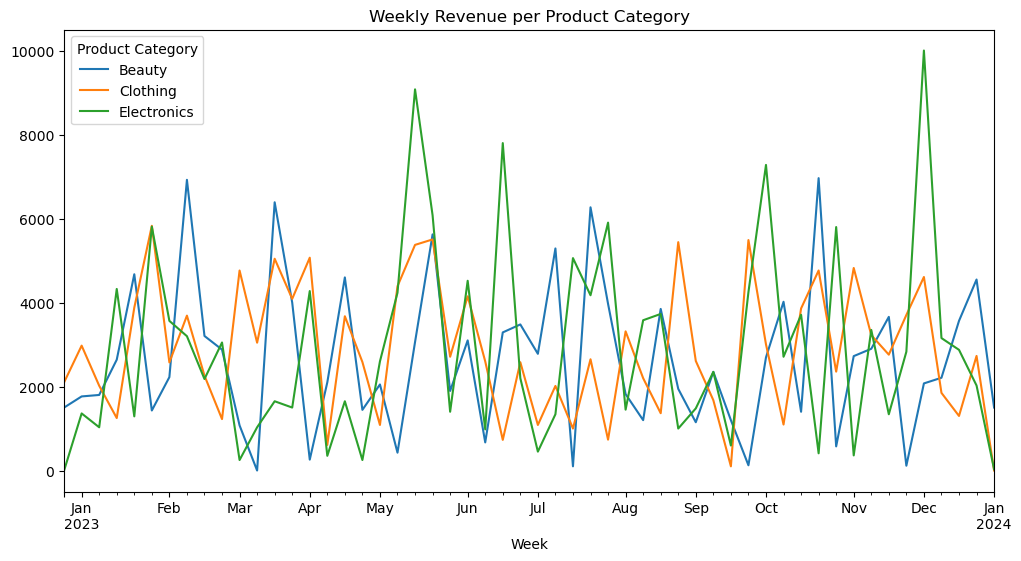

In [288]:
pivot_df.plot(figsize=(12, 6), title="Weekly Revenue per Product Category")

In [289]:
from pmdarima import auto_arima

In [290]:
# Select the 'Electronics' category
electronics_series = pivot_df['Electronics']

In [291]:
# Run ADF test on the original (non-differenced) series
adf_result = adfuller(electronics_series)
adf_result_summary = {
    "ADF Statistic": adf_result[0],
    "p-value": adf_result[1],
    "Used Lags": adf_result[2],
    "Observations": adf_result[3],
    "Critical Values": adf_result[4],
    "Stationary": adf_result[1] < 0.05
}

adf_result_summary

{'ADF Statistic': -6.924532508922769,
 'p-value': 1.124142168617242e-09,
 'Used Lags': 0,
 'Observations': 53,
 'Critical Values': {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 'Stationary': True}

In [292]:
# Fit ARIMA using auto_arima
arima_model = auto_arima(
    electronics_series,
    seasonal=False,         # No seasonal weekly pattern assumed
    trace=True,             # Print model selection steps
    stepwise=True,          # Efficient search
    suppress_warnings=True,
    error_action='ignore'
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1004.592, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1042.769, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1017.099, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1032.305, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1007.584, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1002.772, Time=0.05 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=1004.434, Time=0.07 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=1008.161, Time=0.07 sec
 A

In [293]:
# Refit ARIMA(3,0,3) on Electronics series using statsmodels
model = ARIMA(electronics_series, order=(3, 0, 3))
arima_result = model.fit()

/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/aryan/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


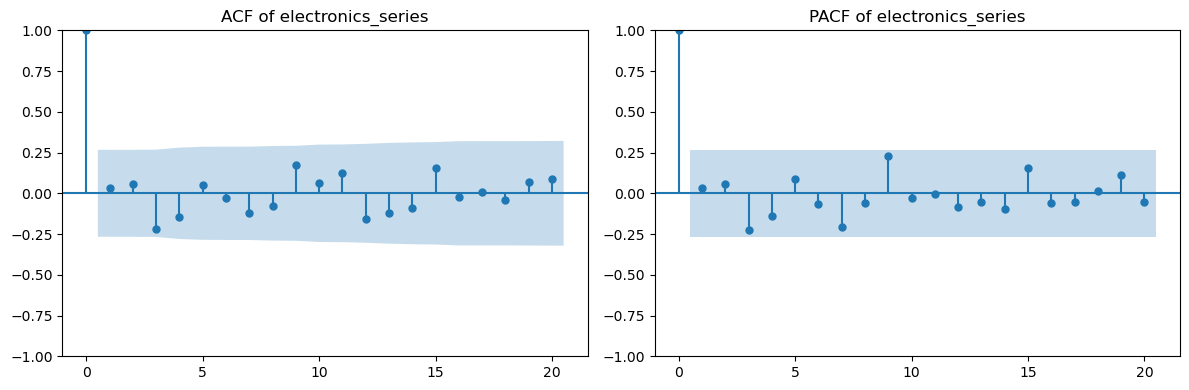

In [294]:

# Plot ACF and PACF of residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(electronics_series, ax=axes[0], lags=20)
axes[0].set_title("ACF of electronics_series")
plot_pacf(electronics_series, ax=axes[1], lags=20)
axes[1].set_title("PACF of electronics_series")
plt.tight_layout()


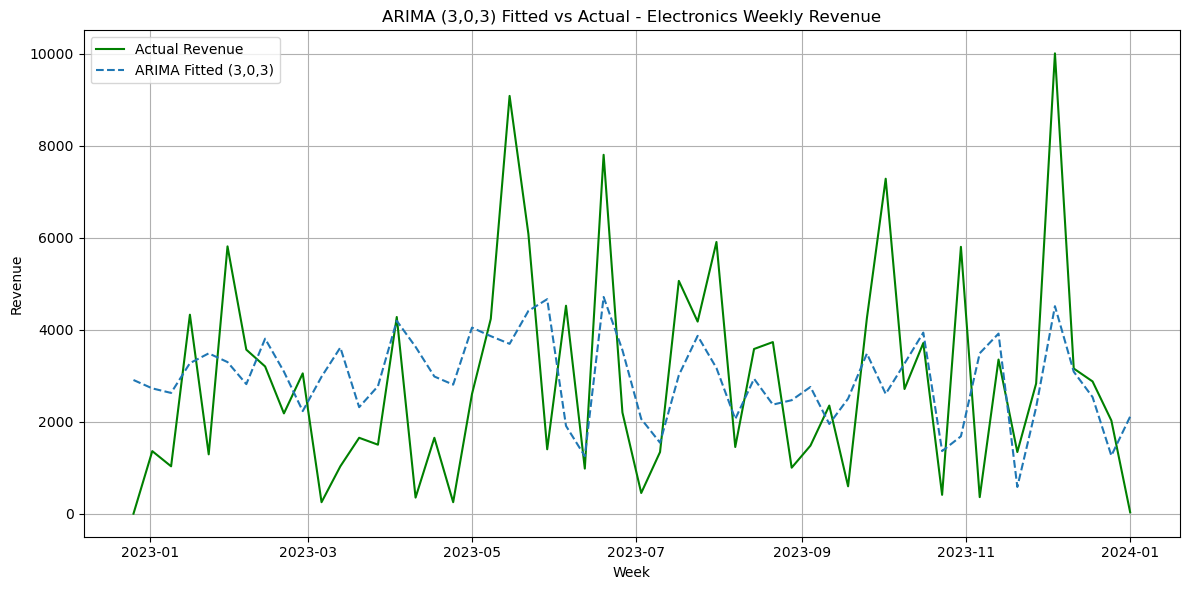

In [295]:
# Get in-sample predictions
arima_fitted = arima_result.fittedvalues

# Align index if needed
arima_fitted.index = electronics_series.index[-len(arima_fitted):]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(electronics_series, label='Actual Revenue',color= "green")
plt.plot(arima_fitted, label='ARIMA Fitted (3,0,3)', linestyle='--')
plt.title("ARIMA (3,0,3) Fitted vs Actual - Electronics Weekly Revenue")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [296]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [297]:
residuals = electronics_series - arima_fitted

In [298]:
xgb_df = pd.DataFrame({'residual': residuals})


In [299]:
# STEP 2: Define feature columns and target
features = ['lag_1', 'lag_2', 'lag_3', 'week_number', 'month']
target = 'residual'

In [300]:
# Step 6: Add lag features
for lag in range(1, 4):
    xgb_df[f'lag_{lag}'] = xgb_df['residual'].shift(lag)


In [301]:
# Step 7: Add time-based features
xgb_df['week_number'] = xgb_df.index.isocalendar().week
xgb_df['month'] = xgb_df.index.month

In [302]:
# Step 8: Drop NA rows from lagging
xgb_df.dropna(inplace=True)

In [303]:
# Define features and target
features = ['lag_1', 'lag_2', 'lag_3', 'week_number', 'month']
target = 'residual'

In [304]:
# STEP 3: Split the data into train/test sets (e.g., 80/20 split)
X = xgb_df[features]
y = xgb_df[target]


In [305]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffle for time series
)

In [306]:
# Finding the best parameters for xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Use the best model`
best_xgb_model = grid_search.best_estimator_
predicted_residuals = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [307]:
# # STEP 4: Train XGBoost regressor
# xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05)
# xgb_model.fit(X_train, y_train)

In [308]:
# # STEP 5: Predict residuals on test set
# predicted_residuals = xgb_model.predict(X_test)

In [309]:
# STEP 6: Predict ARIMA values for the same period
arima_predictions = arima_result.predict(start=X_test.index[0], end=X_test.index[-1])


In [310]:
final_forecast = arima_predictions + predicted_residuals


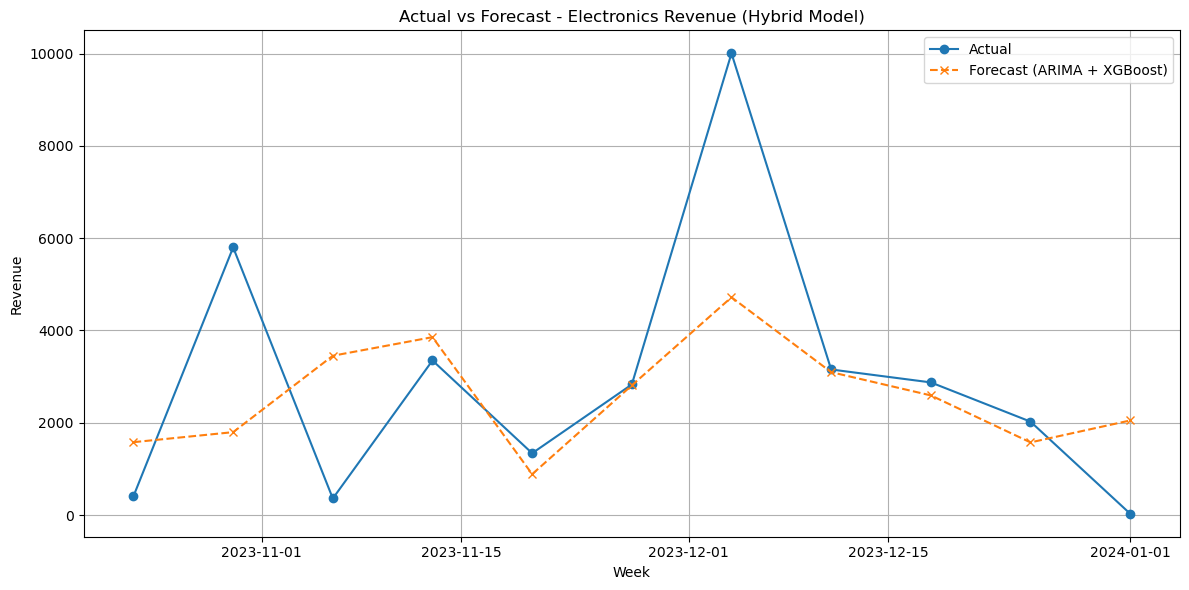

In [311]:
plt.figure(figsize=(12, 6))
plt.plot(actual.index, actual.values, label='Actual', marker='o')
plt.plot(actual.index, final_forecast, label='Forecast (ARIMA + XGBoost)', linestyle='--', marker='x')
plt.title("Actual vs Forecast - Electronics Revenue (Hybrid Model)")
plt.xlabel("Week")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

arima_rmse = mean_squared_error(actual, arima_predictions, squared=False)
hybrid_rmse = mean_squared_error(actual, final_forecast, squared=False)

print("ARIMA RMSE:", arima_rmse)
print("Hybrid RMSE:", hybrid_rmse)


ARIMA RMSE: 2412.6935205500804
Hybrid RMSE: 2330.0542836896225


In [245]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50, 'subsample': 0.8}


In [246]:
from sklearn.metrics import mean_absolute_error

arima_mae = mean_absolute_error(actual, arima_predictions)
hybrid_mae = mean_absolute_error(actual, final_forecast)

print("ARIMA MAE:", arima_mae)
print("Hybrid MAE:", hybrid_mae)


ARIMA MAE: 1707.796116401407
Hybrid MAE: 1576.232750638523


In [247]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

arima_mape = mean_absolute_percentage_error(actual, arima_predictions)
hybrid_mape = mean_absolute_percentage_error(actual, final_forecast)

print("ARIMA MAPE:", arima_mape)
print("Hybrid MAPE:", hybrid_mape)


ARIMA MAPE: 755.2246655256937
Hybrid MAPE: 734.9440417858987


In [209]:
from sklearn.metrics import r2_score

arima_r2 = r2_score(actual, arima_predictions)
hybrid_r2 = r2_score(actual, final_forecast)

print("ARIMA R²:", arima_r2)
print("Hybrid R²:", hybrid_r2)


ARIMA R²: 0.23079866558192264
Hybrid R²: 0.26585369424588634


In [258]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/64/ae/de9348e95db7c2c795635b017761c114e1549120f46c3b345c74ffa20d13/prophet-1.1.7-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/94/34/f308e49c14ff3fc7ecebfdcd54168b333fd218bbfd2eacf46af775bb4f69/holidays-0.75-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for importlib_resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from 